In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [9]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [12]:
nan_columns = df.columns[df.isna().any()].tolist()
print('NaN columns :', nan_columns, "\n# :", len(nan_columns))

NaN columns : ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] 
# : 19


In [17]:
df[df.fillna('ttttt').duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


##### Thankfully, no duplicates !!!! Otherwise with the such a small dataset, it would have been very difficult to sufficient training samples.

In [19]:
Counter(df.BldgType)

Counter({'1Fam': 1220, '2fmCon': 31, 'Duplex': 52, 'TwnhsE': 114, 'Twnhs': 43})

##### Here we need to interpret Twnhs as TwnhsI [Townhouse Inside Unit]

### Univariable analysis

##### Continuous Variable Plot

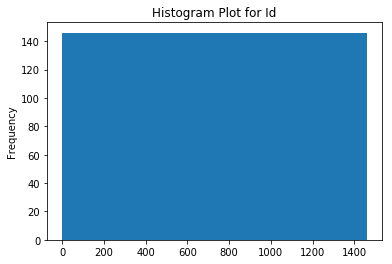

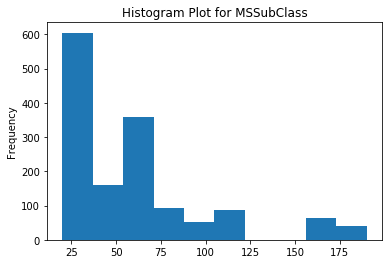

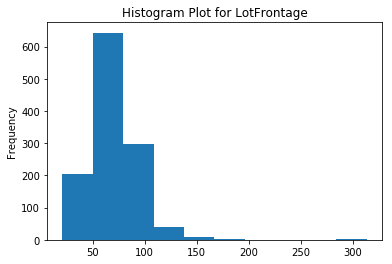

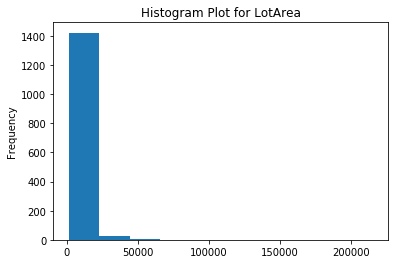

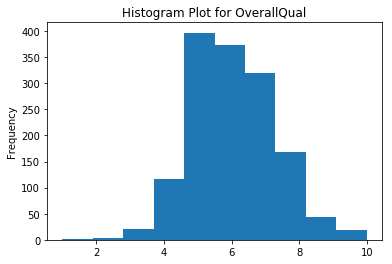

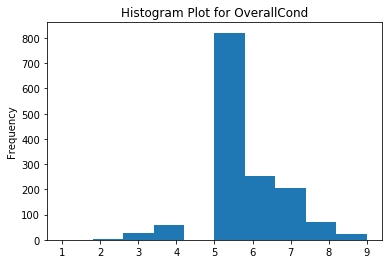

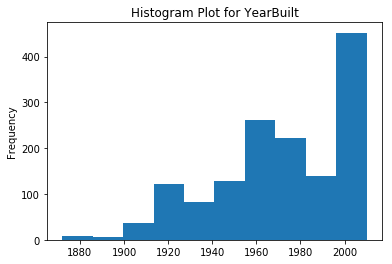

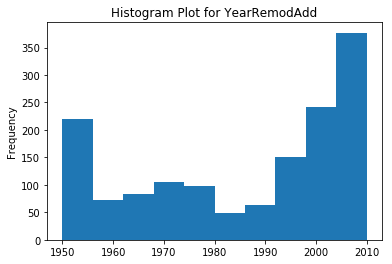

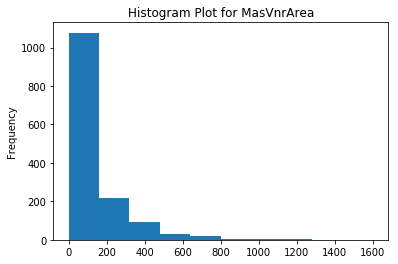

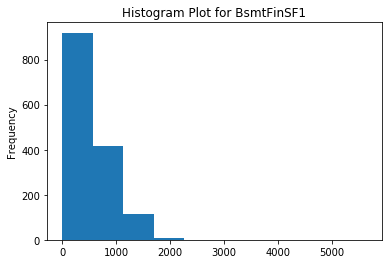

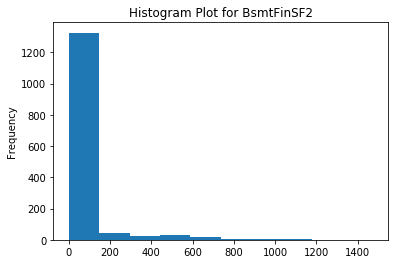

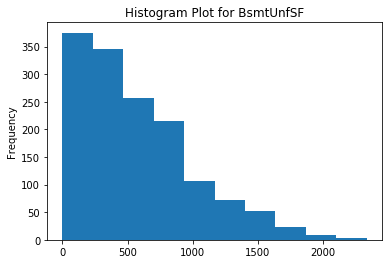

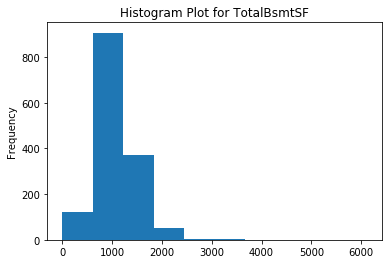

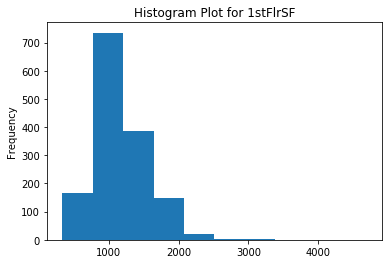

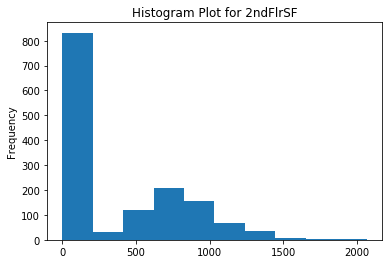

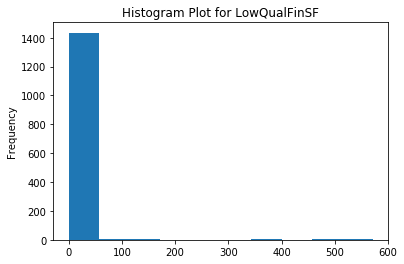

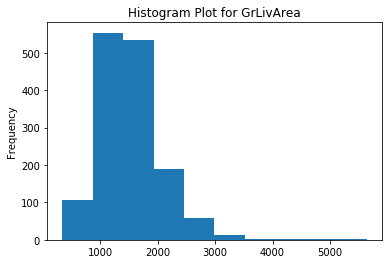

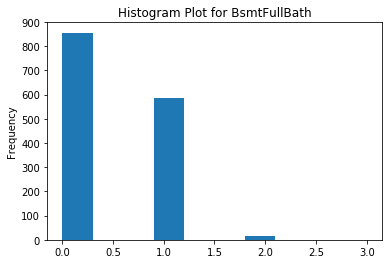

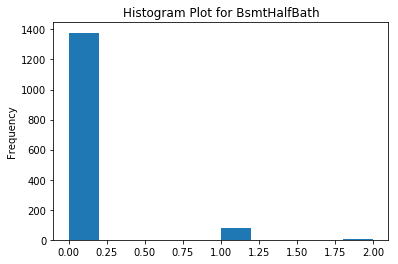

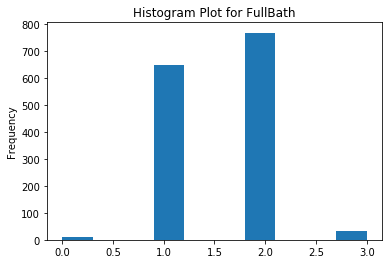

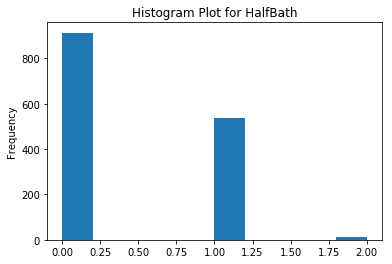

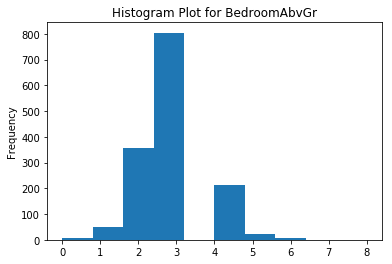

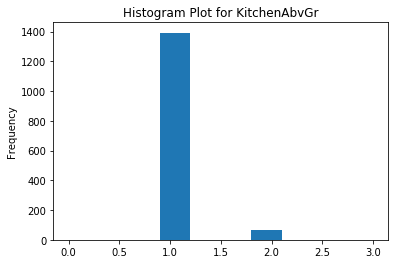

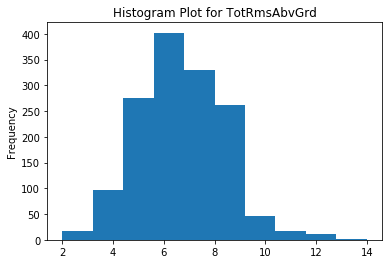

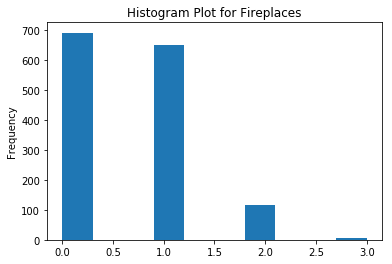

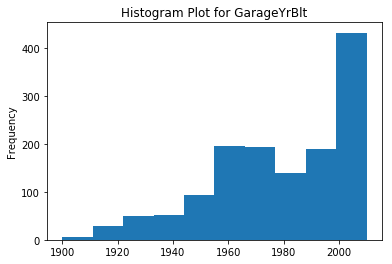

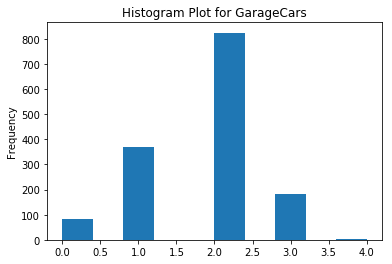

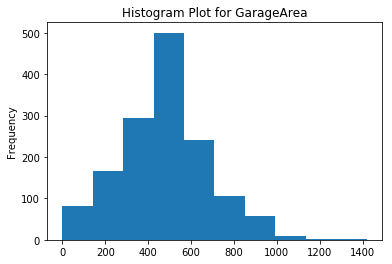

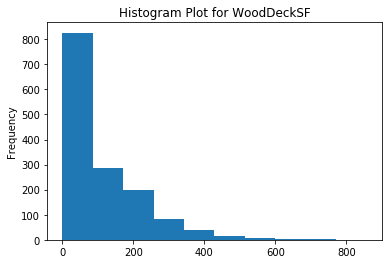

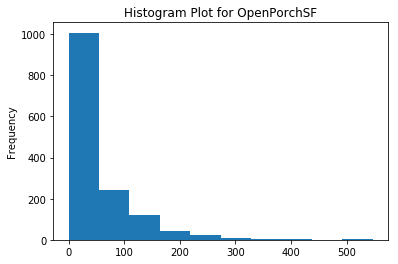

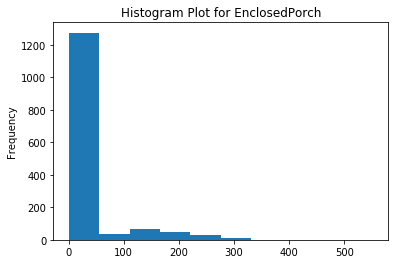

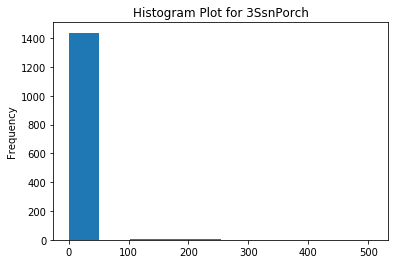

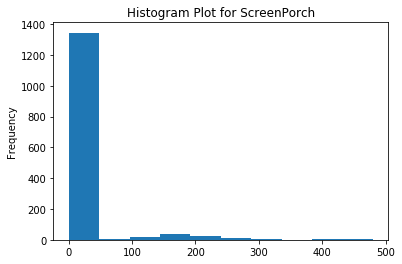

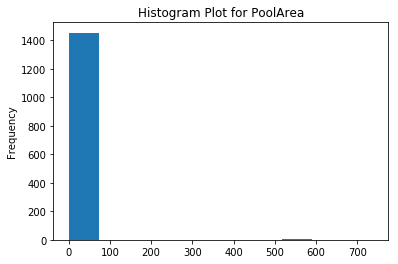

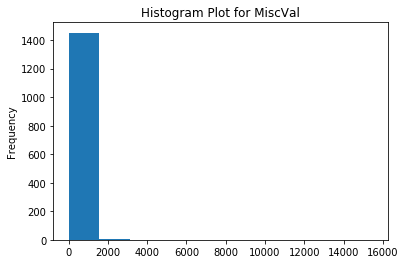

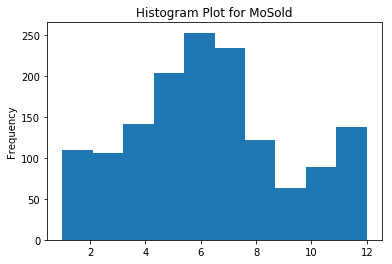

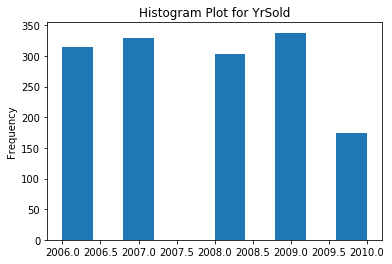

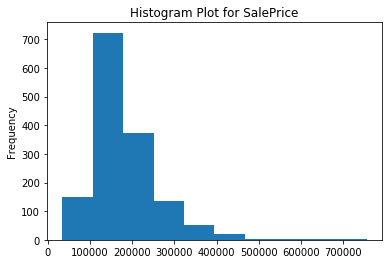

In [24]:
for c in df.select_dtypes(include=[np.number]):
    df[c].plot('hist', title="Histogram Plot for "+c)
    plt.show()

In [29]:
Counter(df.MSZoning)

Counter({'RL': 1151, 'RM': 218, 'C (all)': 10, 'FV': 65, 'RH': 16})

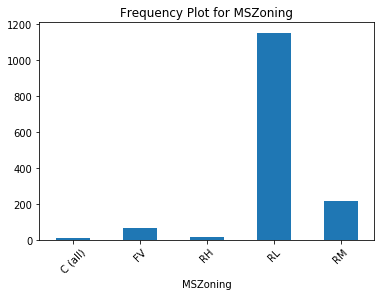

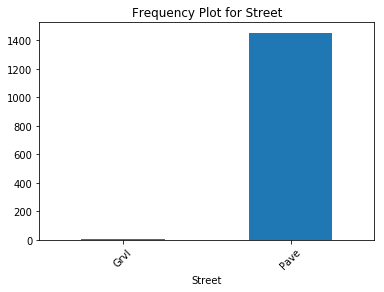

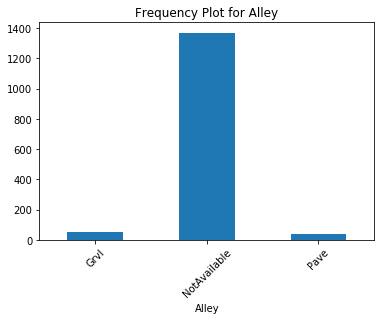

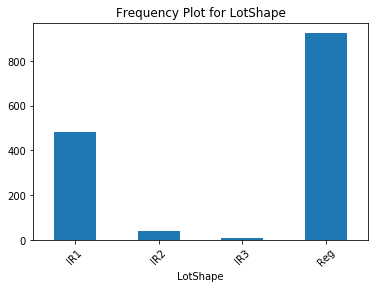

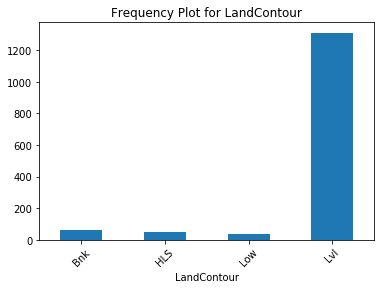

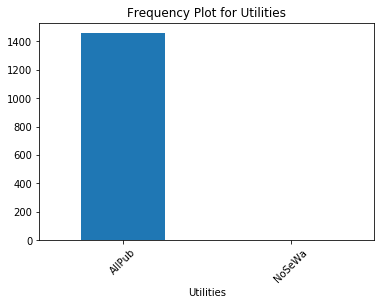

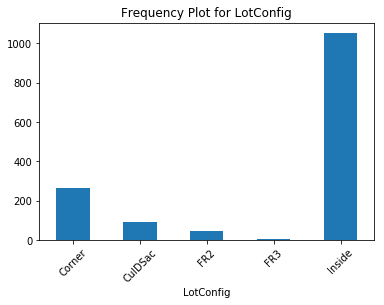

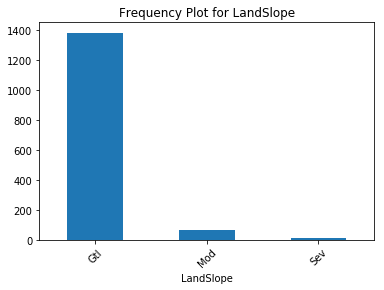

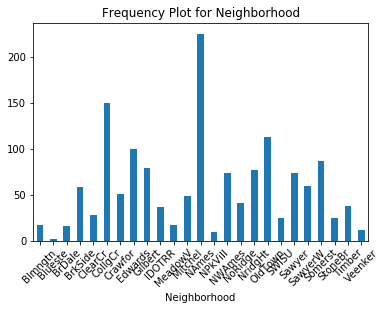

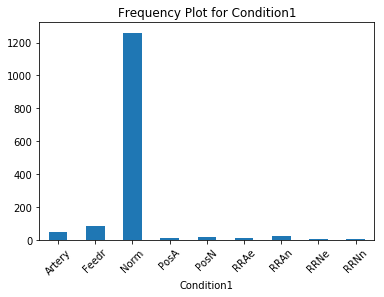

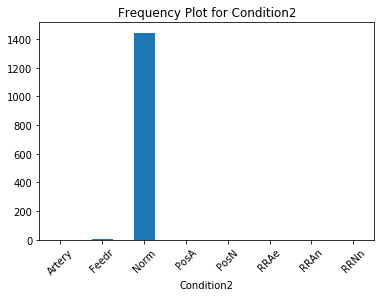

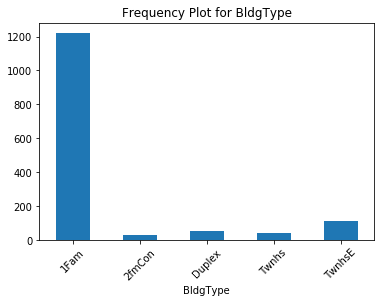

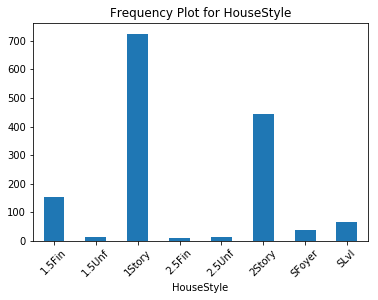

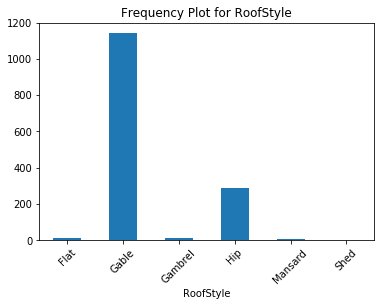

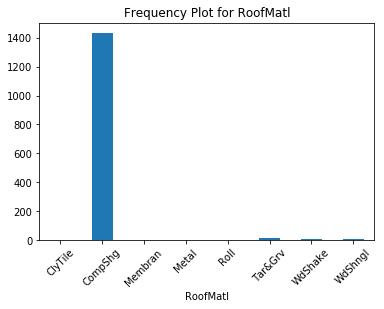

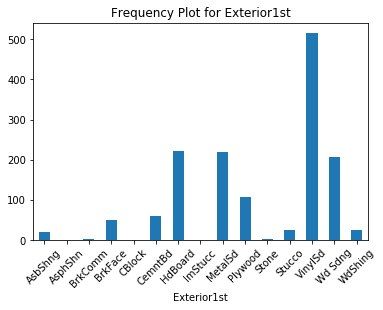

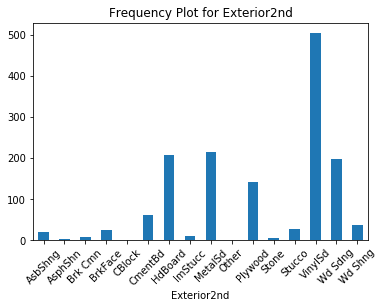

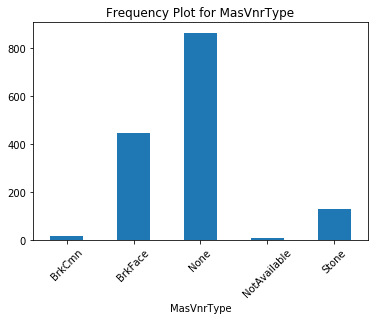

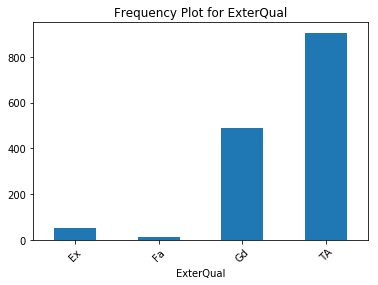

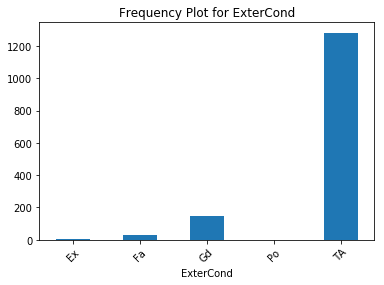

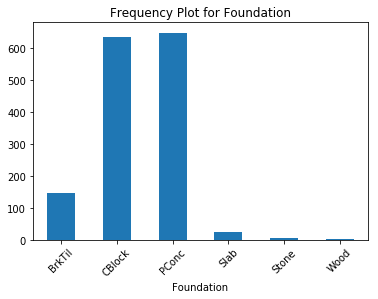

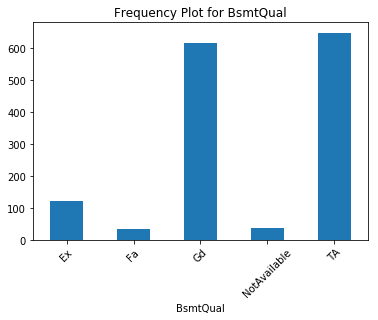

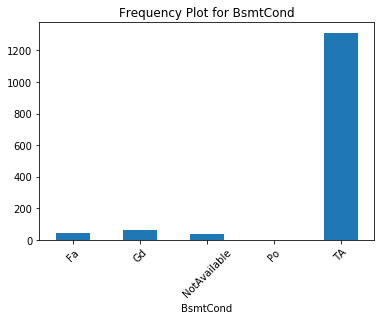

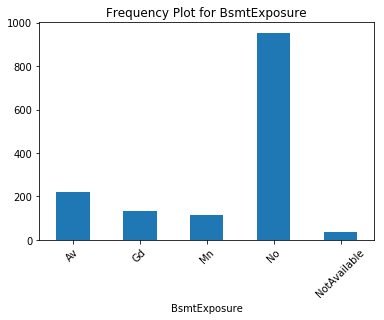

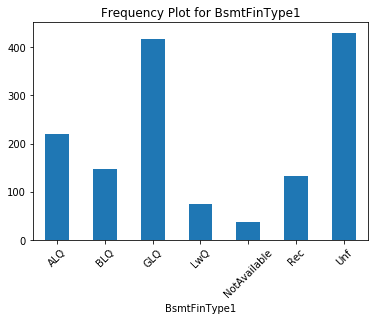

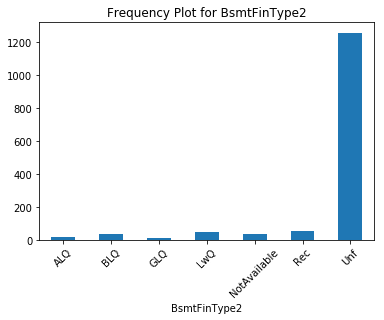

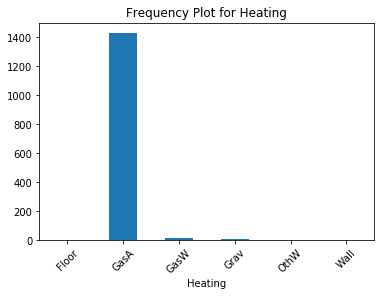

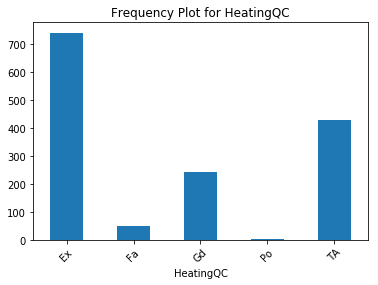

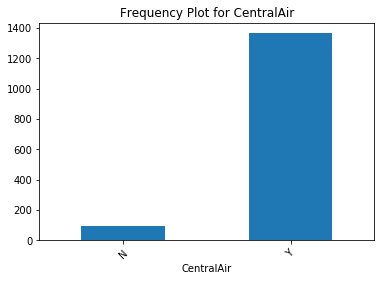

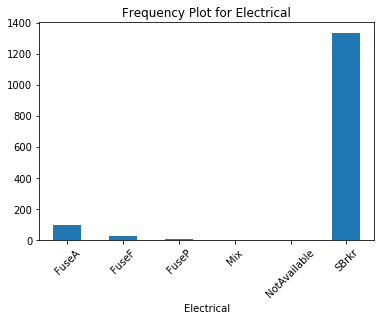

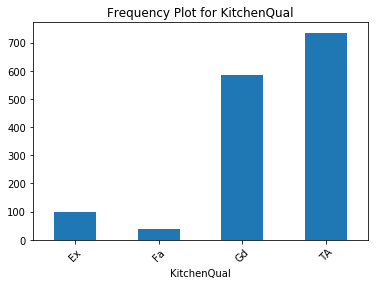

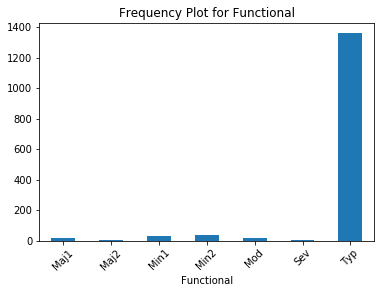

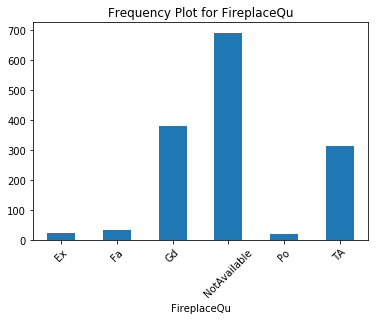

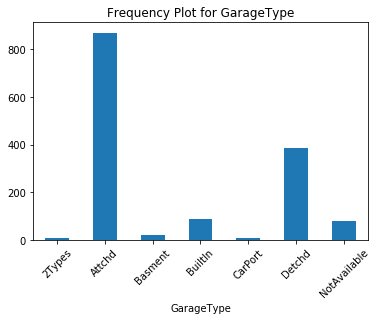

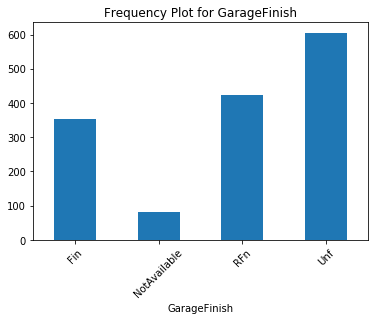

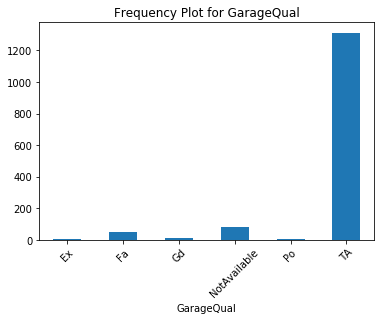

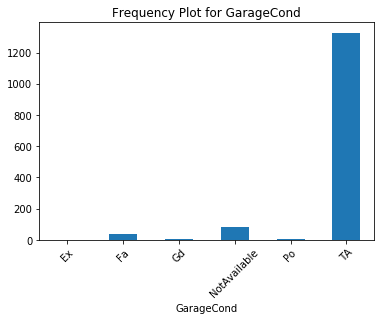

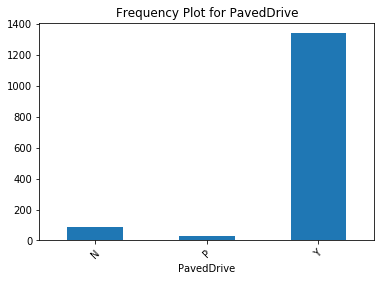

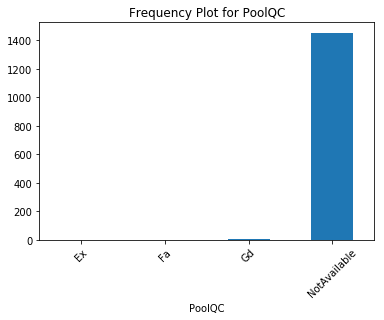

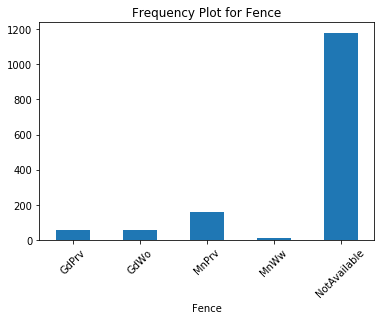

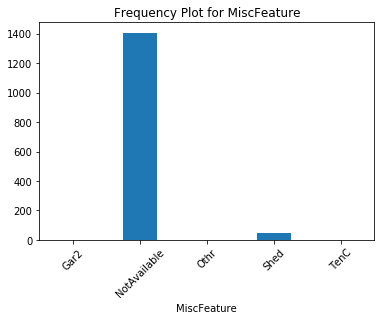

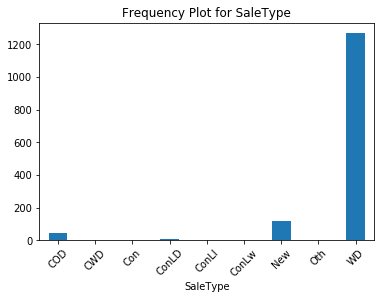

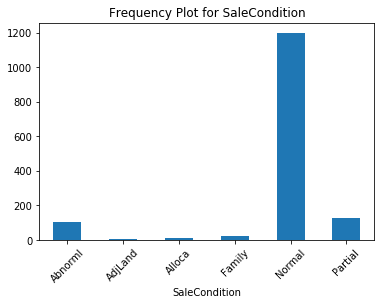

In [45]:
for c in df.select_dtypes(exclude=np.number):
    df[[c,'SalePrice']].fillna('NotAvailable').\
    groupby(by=c).agg('count').reset_index().\
    plot.bar(legend=None, title="Frequency Plot for "+c)
    plt.xticks(rotation=45)
    plt.show()

#### Univariable Analysis:
* SalePrice is in Dollars ("$") as the data set belongs to popular dataset by name "Ames Housing dataset" 
* In year 2009, there were highest sales on houses and 2010 being lowest observed sales figure.
* June seems to be favorite month for sales.... My birth month :)
* Most of the houses have Garage capacity of 2 cars and a sqft size around 400 - 600 ??????
* Most of the houses have only one kitchen.
* From the dataset, we have many houses built after 1990
* Most of the houses are above 'average' conditions and quality.
* Does MSSubClass indicate any history of housing in Ames ??????